In [64]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import csv

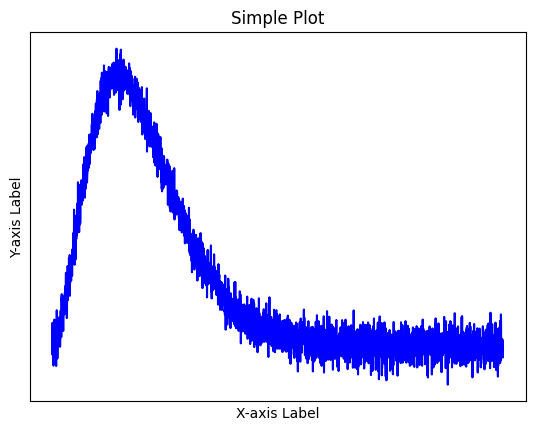

In [65]:
csvfile = open('a3-data\dataset3.txt', 'r')
csvreader1 = csv.reader(csvfile, delimiter = ' ')

freq = []
intensity = []

for row in csvreader1:
    freq.append(row[0])
    intensity.append(row[1])
freq = np.asarray(freq, 'float64')
intensity = np.asarray(intensity, 'float64')

# Create a plot
plt.plot(freq, intensity, color='blue')

# Add labels and a title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Simple Plot')

# Remove x and y ticks
plt.xticks([])  # Remove x ticks
plt.yticks([])  # Remove y ticks

# Show the plot
plt.show()

In [66]:
h = 6.626e-34 
c = 2.997e8
kb = 1.38e-23
e = 2.7182818

In [73]:
def model (x, T):
    return 2*h*(x**3) / (c**2 * np.exp(((h * x /(kb * T)) - 1)))

In [84]:
params, _ = curve_fit(model, freq, intensity, p0 = [1000])
T_pred = params
print(T_pred)

[3891.07209666]


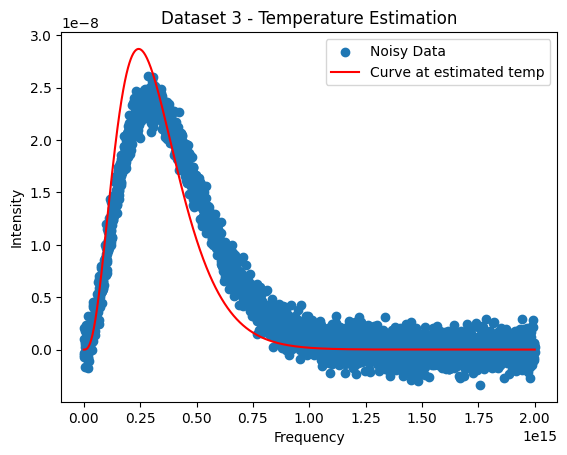

In [69]:
intensity_preds = model(freq, T_pred)
plt.scatter(freq, intensity, label = "Noisy Data")
plt.plot(freq, intensity_preds, label = "Curve at estimated temp", color = "red")
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('Intensity')
plt.title("Dataset 3 - Temperature Estimation")
plt.show()

In [85]:
def model_all_var (x, T, kb, c, h):
    return 2*h*(x**3) / (c**2 * np.exp(((h * x /(kb * T)) - 1)))

In [94]:
params, _ = curve_fit(model_all_var, freq, intensity, p0 = [1e3, 1e-23, 3e8, 6e-34])
T_pred, kb_pred, c_pred, h_pred = params
print(params)

[2.87923950e+03 2.87923949e-23 4.92494457e+08 8.36229809e-34]


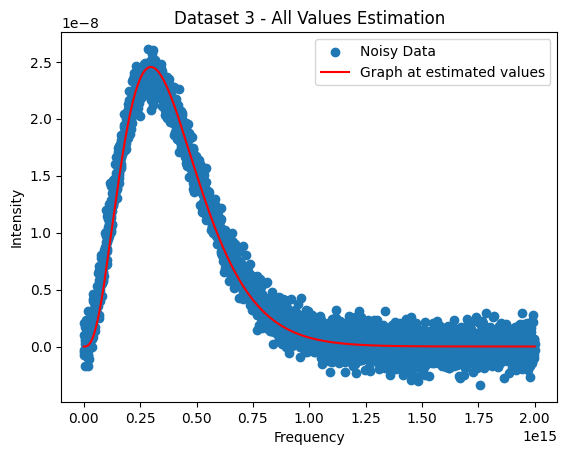

In [95]:
y_preds = model_all_var(freq, T_pred, kb_pred, c_pred, h_pred)

plt.scatter(freq, intensity, label = "Noisy Data")
plt.plot(freq, y_preds, color = 'red', label = "Graph at estimated values")
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('Intensity')
plt.title("Dataset 3 - All Values Estimation")
plt.show()